In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# here we'll load a dataframe from a csv file
df = pd.read_csv('https://raw.githubusercontent.com/JonathanBechtel/data/master/boston.csv')
df.drop(df.columns[0], axis=1, inplace=True)
# the head gives us the first 5 rows in the dataframe
df.head(10)

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2
5,0.02985,6.430,6.0622,222.0,18.7,5.21,28.7
6,0.08829,6.012,5.5605,311.0,15.2,12.43,22.9
7,0.14455,6.172,5.9505,311.0,15.2,19.15,27.1
8,0.21124,5.631,6.0821,311.0,15.2,29.93,16.5
9,0.17004,6.004,6.5921,311.0,15.2,17.10,18.9


In [5]:
# pull descriptive statistics on each of our columns
df.describe()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,6.284634,3.795043,408.237154,18.455534,12.653063,22.532806
std,8.596783,0.702617,2.105710,168.537116,2.164946,7.141062,9.197104
min,0.006320,3.561000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,0.082045,5.885500,2.100175,279.000000,17.400000,6.950000,17.025000
50%,0.256510,6.208500,3.207450,330.000000,19.050000,11.360000,21.200000
75%,3.647422,6.623500,5.188425,666.000000,20.200000,16.955000,25.000000
max,88.976200,8.780000,12.126500,711.000000,22.000000,37.970000,50.000000


In [6]:
# get info about the data types and number of entries for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   RM       506 non-null    float64
 2   DIS      506 non-null    float64
 3   TAX      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [7]:
# find out how many missing values we have
df.isnull().sum()

CRIM       0
RM         0
DIS        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

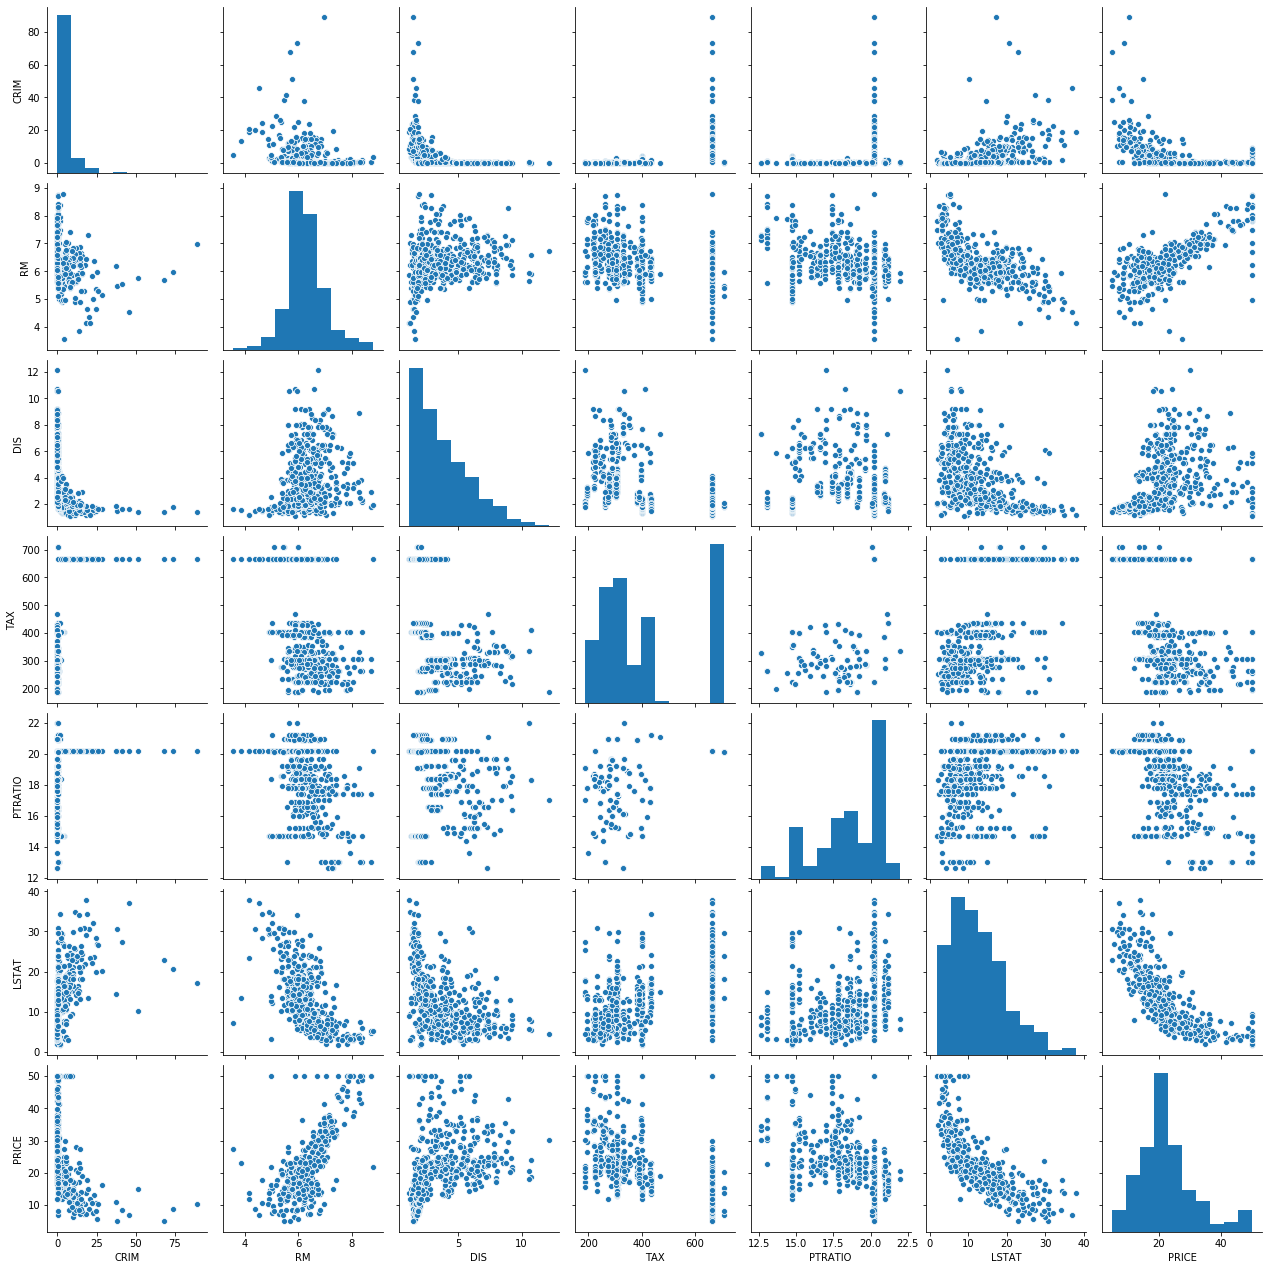

In [8]:
# we can also use matplotlib and seaborn to quickly create different visuals
sns.pairplot(df);

In [9]:
# next, we'll use our dataframe to implement a linear model with scikit learn
model = GradientBoostingRegressor()
X = df[['CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['PRICE']
model.fit(X, y) # here we're training the model on the data

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
df['PREDICTION'] = model.predict(X) # we're creating a new column with the predictions from our data
df.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE,PREDICTION
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0,25.770524
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6,23.131519
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7,34.695753
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4,33.667426
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2,34.872386


In [11]:
df['Error'] = df['PRICE'] - df['PREDICTION'] # this column is the difference between the Price and Prediction -- the Error
df.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE,PREDICTION,Error
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0,25.770524,-1.770524
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6,23.131519,-1.531519
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7,34.695753,0.004247
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4,33.667426,-0.267426
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2,34.872386,1.327614


In [12]:
# We can now use this to see what the importance of different features are
model.feature_importances_ # this stores the coefficient values for each of our variables

array([0.03747671, 0.41485362, 0.09468754, 0.0198686 , 0.03589057,
       0.39722297])

In [13]:
# now let's put this in a more readable form
features = pd.DataFrame({'Variable':    df.columns[0:6],
                             'Importance': model.feature_importances_
                            }).sort_values(by='Importance')

In [14]:
features.head(6)

,Variable,Importance
3,TAX,0.019869
4,PTRATIO,0.035891
0,CRIM,0.037477
2,DIS,0.094688
5,LSTAT,0.397223
1,RM,0.414854


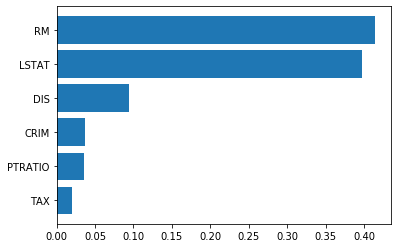

In [16]:
plt.barh(features.Variable, features.Importance);